In [1]:
%load_ext autoreload
%autoreload 2

In [117]:
from hypergraph_generator import generate_hypergraph

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# célok: network dinamika, adatok outputja




#hipergráf generálás

name='d_regular'
args={'n':30, 'd':2,'edge size':5, 'distribution':'uniform'}


H = generate_hypergraph(name, args)

### Egyszerű terjedés A=-1, B=1 vélemény fele-fele inicaializálással: ###

#inicializáljuk 
N=len(H.nodes) # csúcsok száma
opinion=-1*np.ones(N) # vélemény vektor
init_B=np.random.choice(H.nodes,int(N/2),replace=False) #random a fele B véleményre
opinion[init_B] = np.ones(len(init_B))

#beta a véleményváltoztatás paramétere
beta = 0.2

#iterációk száma
iterations=5000

#list of logs
node_opinionslog=[]
sum_A_log=[np.sum(opinion==-1)]
sum_B_log=[np.sum(opinion==1)]

sum_A_by_edge = np.array([np.sum(opinion[edge]==-1) for edge in H.edges])
edge_sizes = np.array([len(edge) for edge in H.edges])

for i in range(iterations):
    
    act_node = np.random.choice(H.nodes,1)[0] 
    
    if opinion[act_node] == -1:
        diff_opinions = 1 - sum_A_by_edge[H.edgelists_indices[act_node]]
    else:
        diff_opinions = sum_A_by_edge[H.edgelists_indices[act_node]]
    
    edge_sizes = edge_sizes[H.edgelists_indices[act_node]]
    
    #terjedés : h élek m élek különböző vélemények aránya a háztartás és munkahely élekben: 
    #változás valószínűsége: beta * (h + 0.5 m) / 1.5

    p = np.random.random()
    h=diff_opinions[0]/edge_sizes[0]
    m= diff_opinions[1]/edge_sizes[1]
    if p < beta * np.sum(h + 0.5 * m)/1.5:
        opinion[act_node]=-1*opinion[act_node]
        
    elif m > 0.5:
        if opinion[act_node] == -1:
            
        edge_to_move = np.random.choice(H.edges[int(number_of_edges/2):][sum_by_edge[int(number_of_edges/2):]>0.5],1)[0]
       
    sum_A_log.append(np.sum(opinion==-1))
    sum_B_log.append(np.sum(opinion==1))

(array([  0.,   0.,  12., 111., 249., 303., 200.,  83.,  30.,  12.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

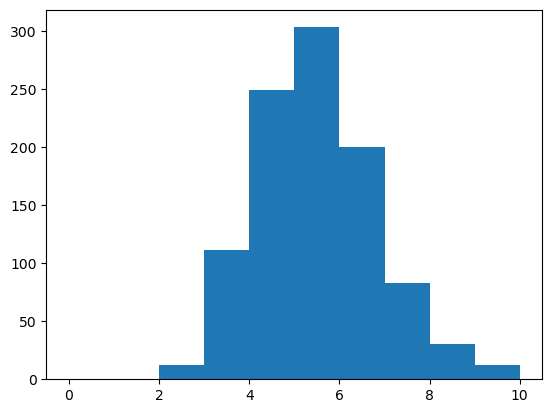

In [111]:
# distribution of workplace edge sizes
edge_sizes=[len(edge) for edge in H.edges[int(number_of_edges/2):]]
plt.hist(edge_sizes, bins=np.arange(11))

(array([373.,   0.,  16.,  24., 212.,  63.,  48.,   2., 238.,   0.,  79.,
        247.,   1.,  61.,  14.,  40., 217.,  12.,   1., 352.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

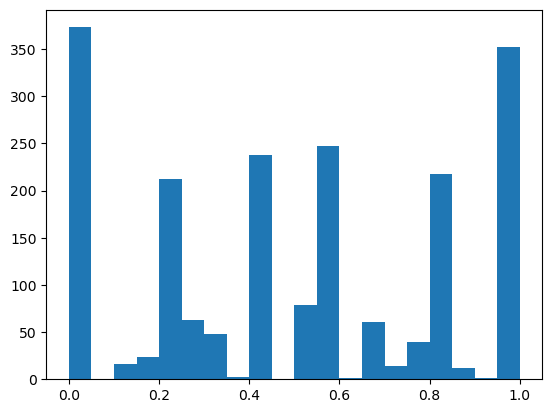

In [114]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges]

plt.hist(opidistr, bins=20)


(array([208.,   0.,  16.,  24.,  48.,  63.,  48.,   2.,  63.,   0.,  79.,
         55.,   1.,  61.,  14.,  40.,  64.,  12.,   1., 201.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

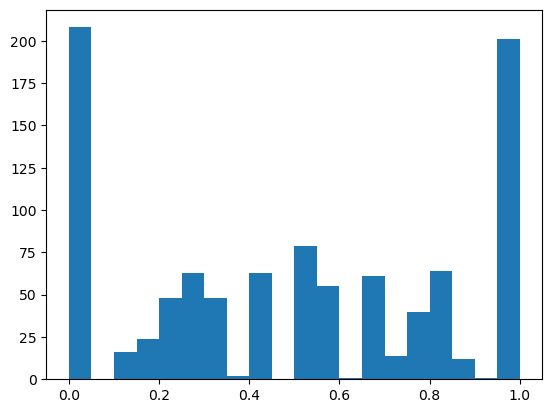

In [115]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges[int(number_of_edges/2):]]

plt.hist(opidistr, bins=20)


(array([165.,   0.,   0.,   0., 164.,   0.,   0.,   0., 175.,   0.,   0.,
        192.,   0.,   0.,   0.,   0., 153.,   0.,   0., 151.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

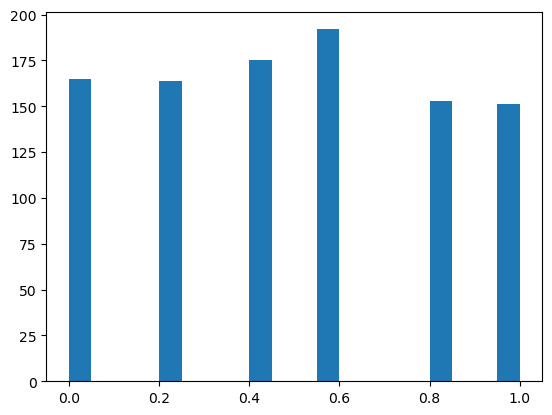

In [116]:
# distribution inside the edges
opidistr=[np.sum(opinion[edge]==-1)/len(edge) for edge in H.edges[:int(number_of_edges/2)]]

plt.hist(opidistr, bins=20)